In [1]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


# Исследование закономерности успешности игр.

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017г.

## Откройте файл с данными и изучите общую информацию

In [2]:
#Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [3]:
#Откроем файл с данными и сохраним в переменную data
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [4]:
#Выведем первые 15 строк датасета и общую инфу
data.info()
data.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


  Перед нами датасет, который содержит в себе информацию о названиях игровых платформ, играх и их годах релиза, количествах продаж по Северной Америке, Европе и Японии, данные о рейтингах и возрастных ограничениях.
    
При первом знакомстве с данными мы видим:
- датасет состоящий из 16715 строк;
- данные в формате object и float.
    
Перед началом исследований необходимо будет сделать предобратоку: привести названия столбцов к одному регистру, определить необходимо ли заполнить пропуски и изменить тип данных в столбцах User_Score для будущих расчетов и Year_of_Release для удобства отображения. 

## Предобработка данных

### Заменим названия столбцов

In [5]:
#Приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработаем пропуски и заменим тип данных

In [6]:
#Узнаем количество пропущенных значений для всех столбцов
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
#Удалим стороки со значением na в столбце year_of_release, name и genre
data = data.dropna(subset=['year_of_release', 'name', 'genre'])

In [8]:
#Переведем тип year_of_release в int
data['year_of_release'] = data['year_of_release'].astype(int)

Посмотрим на слобцы critic_score, user_score, rating 

In [9]:
#Посмотрим на уникальные значения в столбцах user_score, critic_score и rating
display(data['user_score'].unique())
display(data['rating'].unique())
display(data['critic_score'].unique())

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [10]:
#Заменим значения "tbd" на nan
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [11]:
#Изменим тип данных столбцов на числовой
data['user_score'] = data['user_score'].astype(float)

In [12]:
data.query('rating == "RP"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14270,Supreme Ruler: Cold War,PC,2011,Strategy,0.0,0.03,0.0,0.01,63.0,6.8,RP


В столбце rating мы видим аббревиатуру RP - это так же обозначение для ретинга, который еще не присвоили. Однако такая строка лишь одна, тем неменее заменим ее на заглушку "Unknown". 

In [13]:
#Заменим значения "RP" на Unknown
data['rating'] = data['rating'].str.replace('RP', 'Unknown')
#Изменим значения "К-А" на "Е10+"
data['rating'] = data['rating'].str.replace('K-A', 'E10+')

Видим пропуски в столбцах с годами и оценками, рейтингом. 
Данных в столбце year_of_release может не быть из-за несоответствия форматов, например. 
В то время как отсутствия значений рейтингов может быть связано с тем, что игры имеют ранний год выпуска, когда еще не были введены оценки и рейтинги. Либо наоборот игра-новинка и еще не имеет оценок.

Так как строк с пропусками в столбце с годами, названиями и жанрами очень мало, мы такие строки удалим без вреда. Другие пропуски мы оставим без изменений, так как их удаление или заполнение может исказить данные.

В столбце user_score мы видим обозначение tbd - это означает, что рейтинг еще не представили (не анонсировали). Такое значение мы приравняли к отсутствию рейтинга - nan.

В столбце rating мы видим аббревиатуру RP - это так же обозначение для ретинга, который еще не присвоили. Заменим на заглушку "Unknown". А вот значение K-A устаревшее, аналог современного Е10+. Произвели соответствующую замену.

Изменили тип данных столбцов user_score и year_of_release для последующего удобства расчетов. 

### Посчитаем продажи во всех регионах

In [14]:
#Создадим новый столбец и поместим в него общую сумму всех продаж
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
#Проверим, что код сработал
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Проведем исследовательский анализ данных

### Количество выпускаемых игр по годам

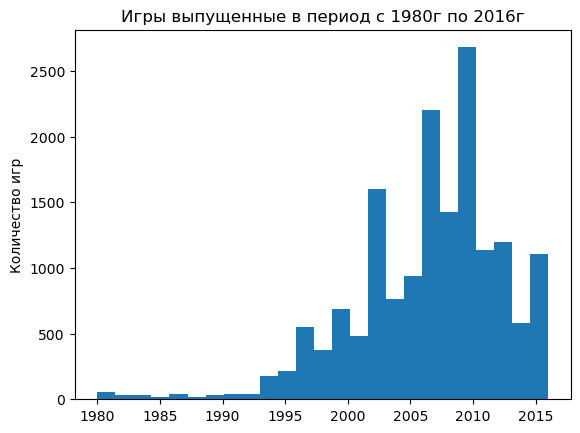

In [15]:
#Посмотрим сколько игр выпускалось в разные года
data['year_of_release'].plot.hist(bins=25)
plt.title('Игры выпущенные в период с 1980г по 2016г')
plt.ylabel('Количество игр')
plt.show()

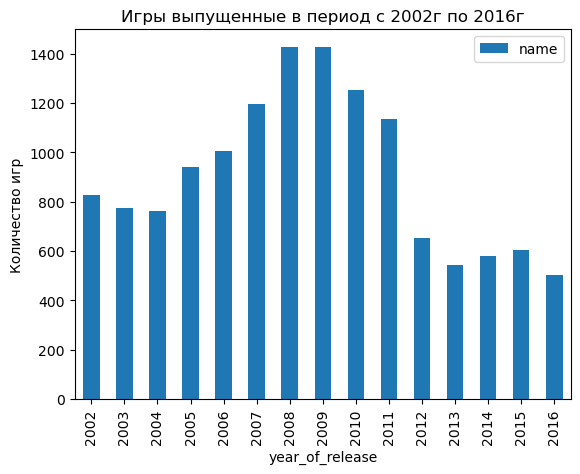

In [16]:
#Посмотрим сколько игр выпускалось в период с 2002 по 2016гг
(
    data.query('year_of_release >=2002')
    .pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar')
)
plt.title('Игры выпущенные в период с 2002г по 2016г')
plt.ylabel('Количество игр')
plt.show()

По графикам мы видим, что бум-выпусков игр приходится на 2008-2009 года. За эти года было выпущено рекордное количество игр. Начиная с 2012 года количество релизов падает.

Так как нам нужен прогноз на 2017 год.,  возьмем выборку с 2012 года по 2016 - где объём релизов схож.

### Изменения продаж по платформам

In [17]:
#Выведем на экран 10 самых прибильных платформ
most_pop_platform = (
    data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
)
mp_platform = most_pop_platform[:10]
mp_platform

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


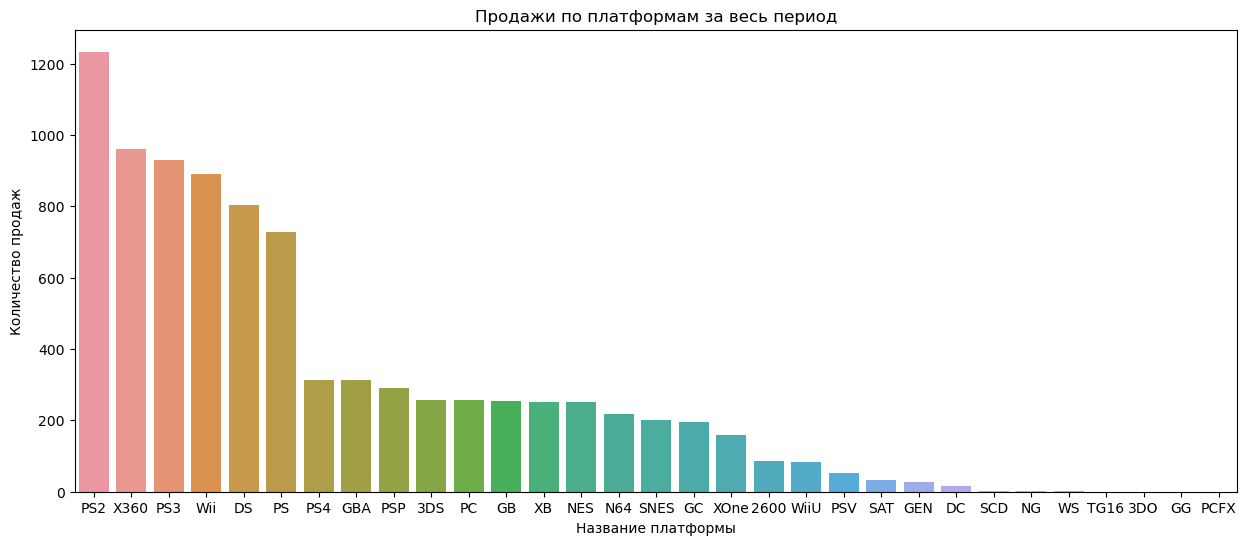

In [18]:
#Посмотрим на общее распределение прибыли по платформам
plt.figure(figsize=(15,6))
sns.barplot(x=most_pop_platform.index,y=most_pop_platform['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")
plt.show()

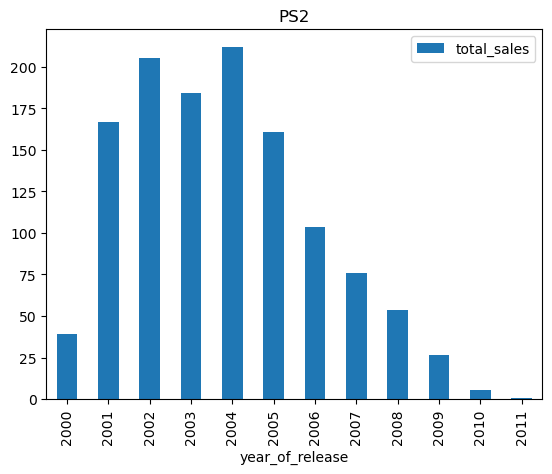

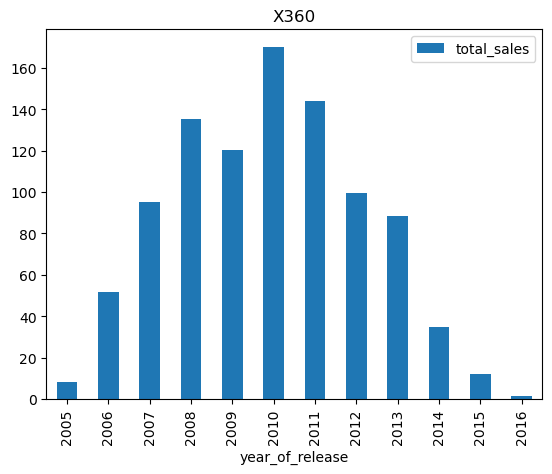

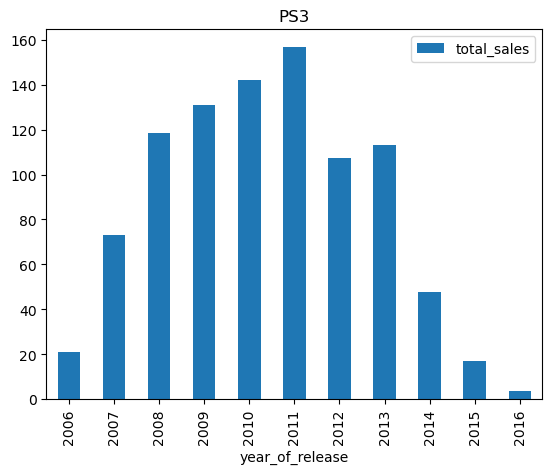

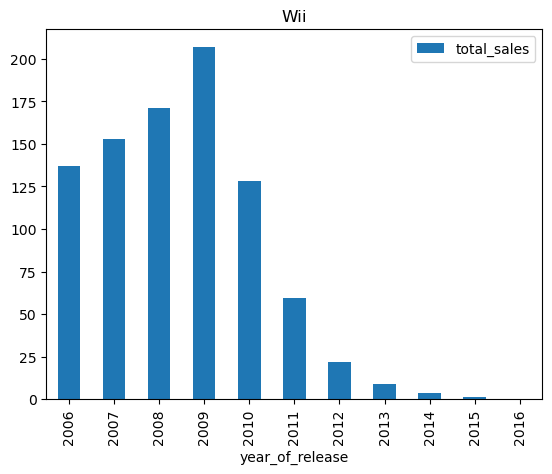

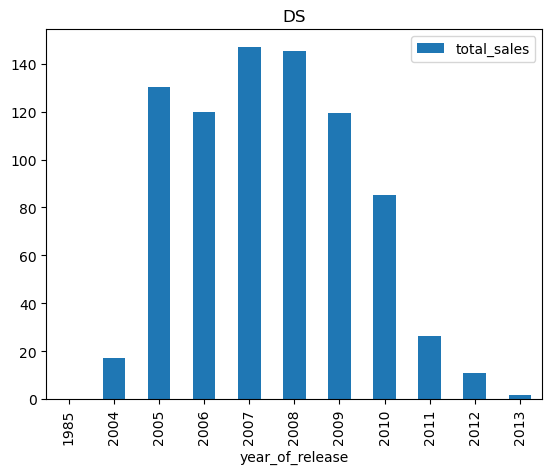

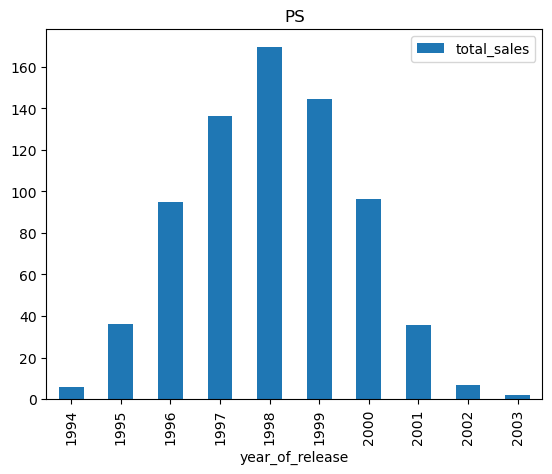

In [19]:
#Напишем функцию для вывода статистики прибыли по годам по шестерке самых прибыльных платформ
for platform in most_pop_platform.index[:6]:
    (data.query('platform == @platform')
     .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc='sum')
     .plot(kind='bar')
    )
    plt.title(platform)
    plt.show()

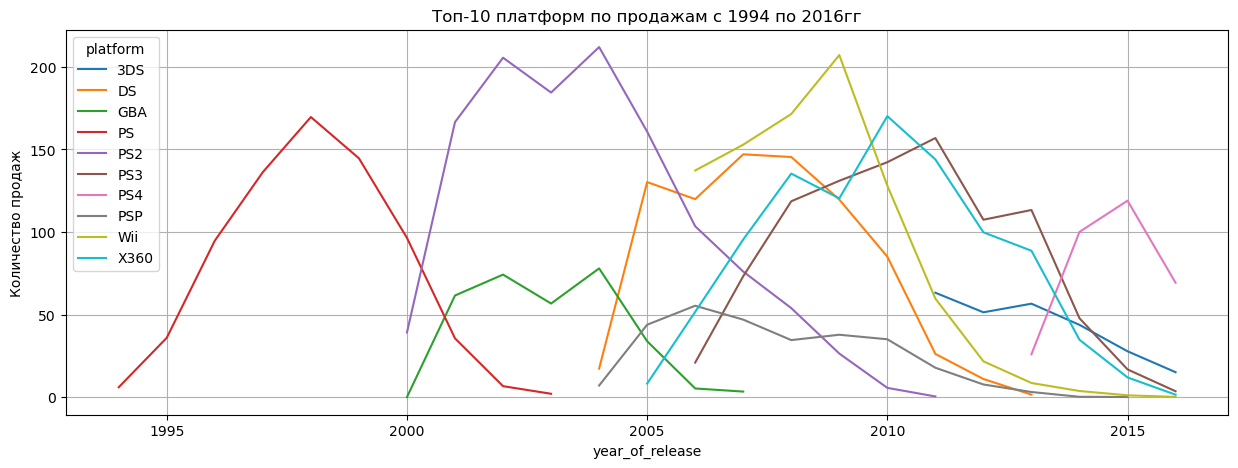

In [20]:
#Посмотрим как менялись продажи среди топ-10 платформ, которые вышли после 1993г
(
data.query('platform in @mp_platform.index and year_of_release > 1993')
    .pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')
    .plot(grid=True, figsize=(15, 5))
)
plt.title("Топ-10 платформ по продажам с 1994 по 2016гг")
plt.ylabel("Количество продаж")
plt.show()

По графику видно, что платформа "живет" в среднем 10 лет. Через 1-3 года после релиза виден подъём продаж, который длится в среднем 2-3 года.

**За актуальный период возьмем период с 2012 по 2016гг**

### Потенциально прибыльные платформы

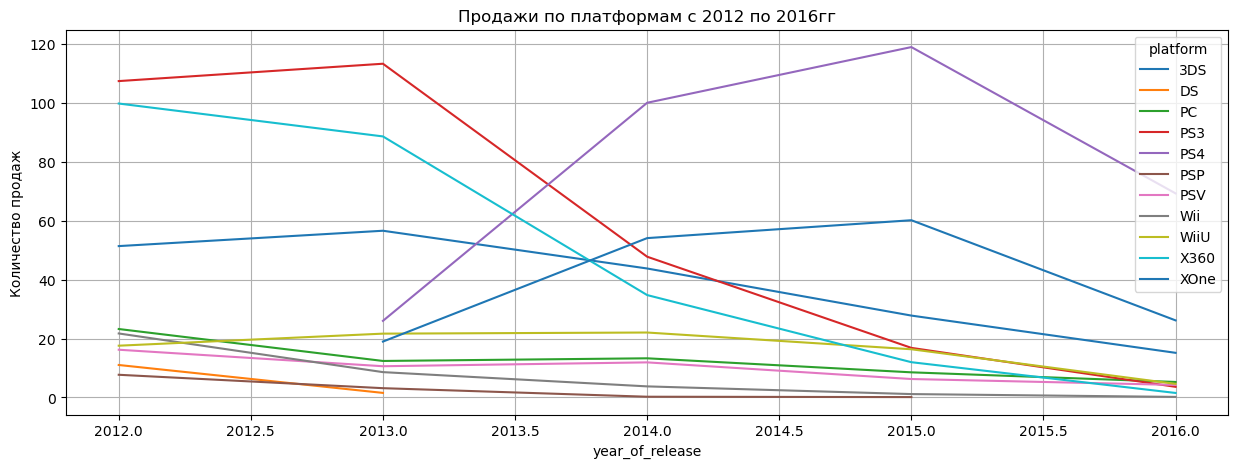

In [21]:
#Посмотрим графики продаж платформ, которые вышли с 2012г.
(
data.query('year_of_release >= 2012')
    .pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')
    .plot(grid=True, figsize=(15, 5))
)
plt.title("Продажи по платформам с 2012 по 2016гг")
plt.ylabel("Количество продаж")
plt.show()

По графику мы видим две платформы, которые еще могу показать достойные продажи: PS4 и XOne. Проверим это по еще одному графику.

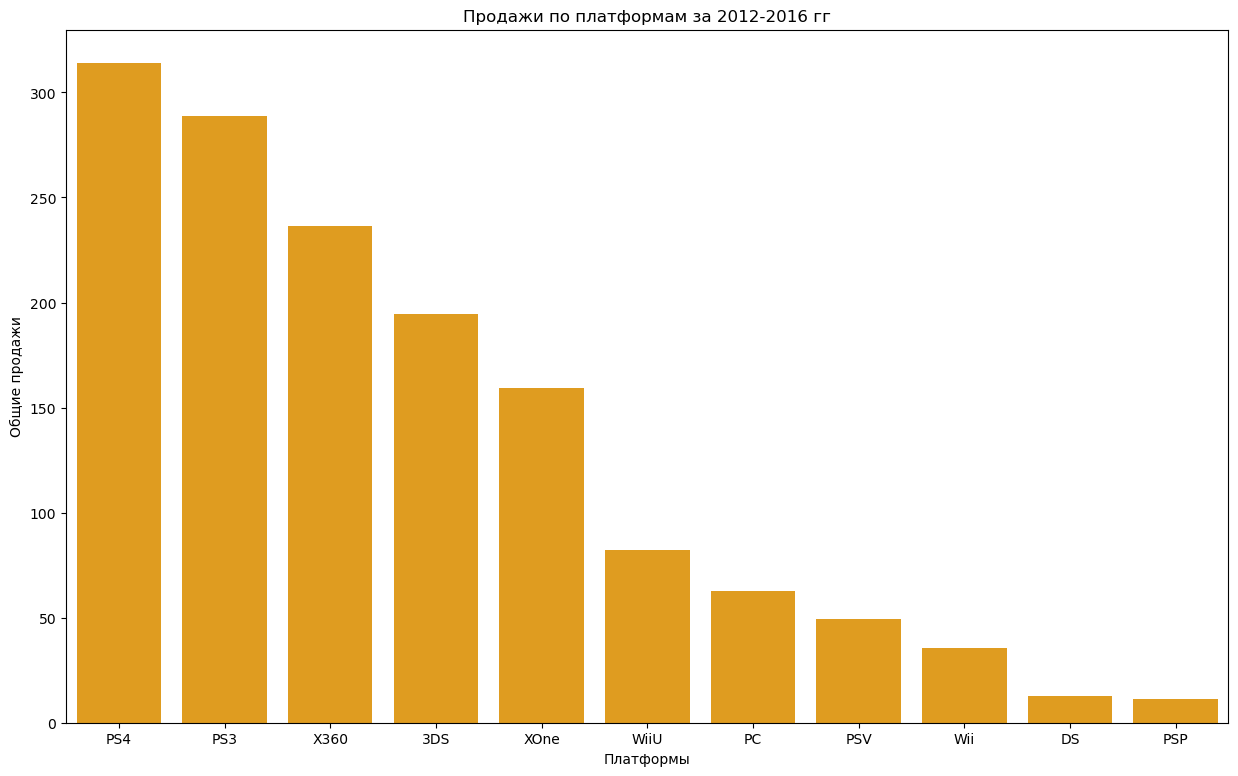

In [22]:
actual_data = (
data.query('year_of_release >= 2012')
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
)

plt.figure(figsize=(15,9))
(sns.barplot(data=actual_data, x=actual_data.index, y='total_sales', color='orange')
.set(title = 'Продажи по платформам за 2012-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()

Среди платформ лидеры продаж:
- PS4
- PS3
- X360
- 3DS
- XOne

Однако PS3, X360, 3DS "на закате" своей работы. Поэтому перспективными может считать только PS4 и XOne.

### Исследование глобальных продаж игр в разбивке по платформам

In [23]:
#Создадим переменную по актуальному периоду
games = data.query('year_of_release >= 2012').copy()

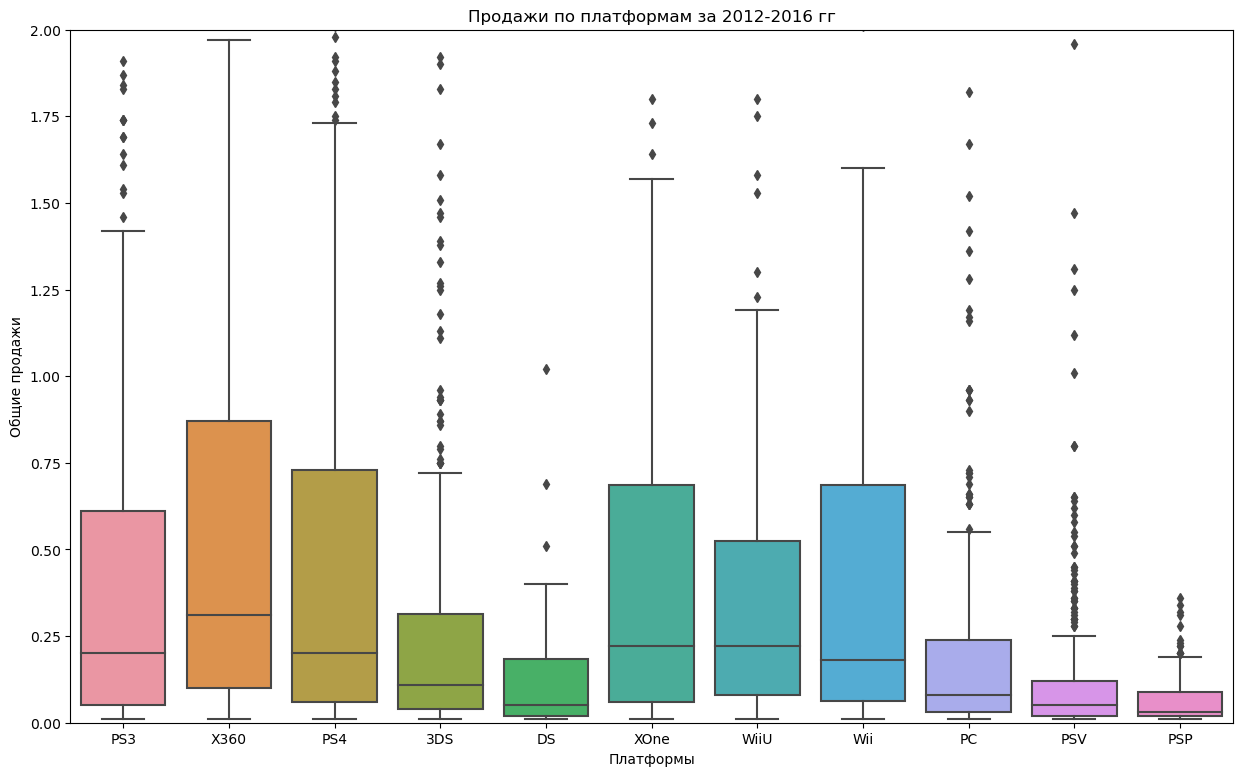

In [24]:
#Построим график методом boxplot, отражающий глобальные продажи по платформам
plt.figure(figsize=(15, 9))
(sns.boxplot(data = games, y = 'total_sales', x='platform')
    .set(title = 'Продажи по платформам за 2012-2016 гг', 
         xlabel = 'Платформы', 
         ylabel = 'Общие продажи',
         ylim=(0, 2)))
plt.show()

По графику видим, что у платформ PS3, PS4, XOne, WiiU и Wii примерно схожие медианные значения - 0,2млн. 
X360 был бесспорно очень популярным, но мы знаем из предшествующих исследований, что к концу 2016 года его продажи стремятся к нулю. Оставшиеся 5 платформ показывают медианное значение не более 0,1млн.

### Влияние отзывов на продажи внутри одной популярной платформы

In [25]:
#Выберем самую популярную платформу PS4. Выберем данные с оценками больше или равными 1
games_ps4 = games.query('platform == "PS4" and critic_score >= 1 and user_score >= 1')

0.40589480145836687


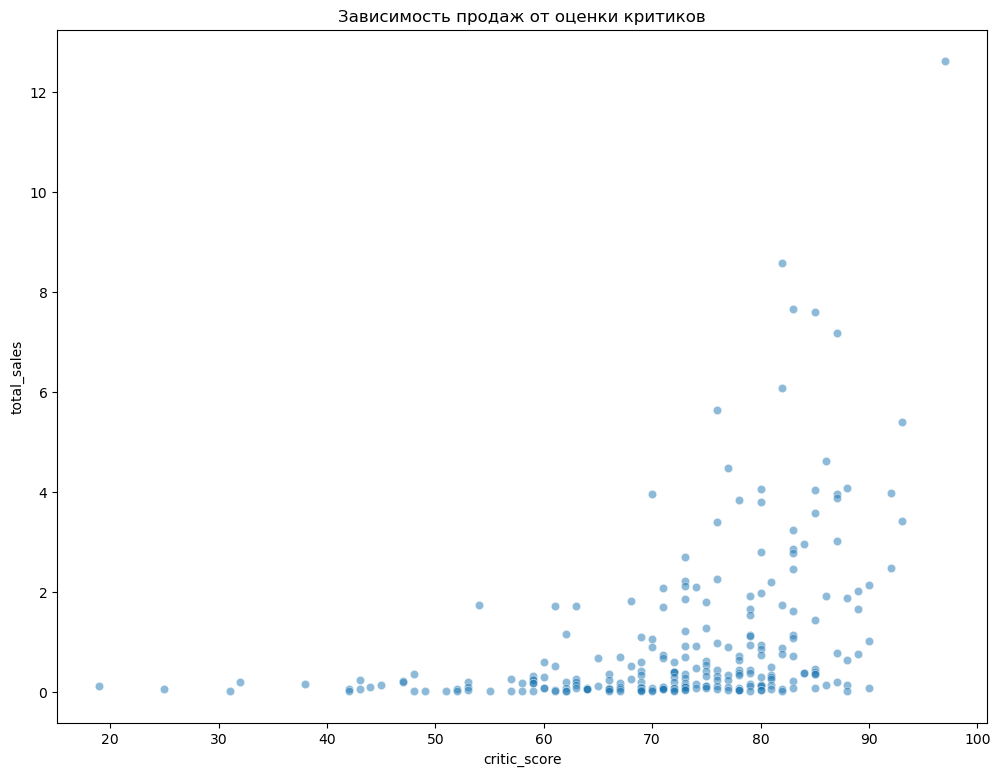

In [26]:
#Построим график зависимости продаж от оценки критиков и посмотрим на уровень корреляции
print(games_ps4['critic_score'].corr(games_ps4['total_sales']))
plt.figure(figsize=(12, 9))
sns.scatterplot(x=games_ps4['critic_score'], y=games_ps4['total_sales'], alpha=0.5)
plt.title('Зависимость продаж от оценки критиков')
plt.show()

-0.03362497596528878


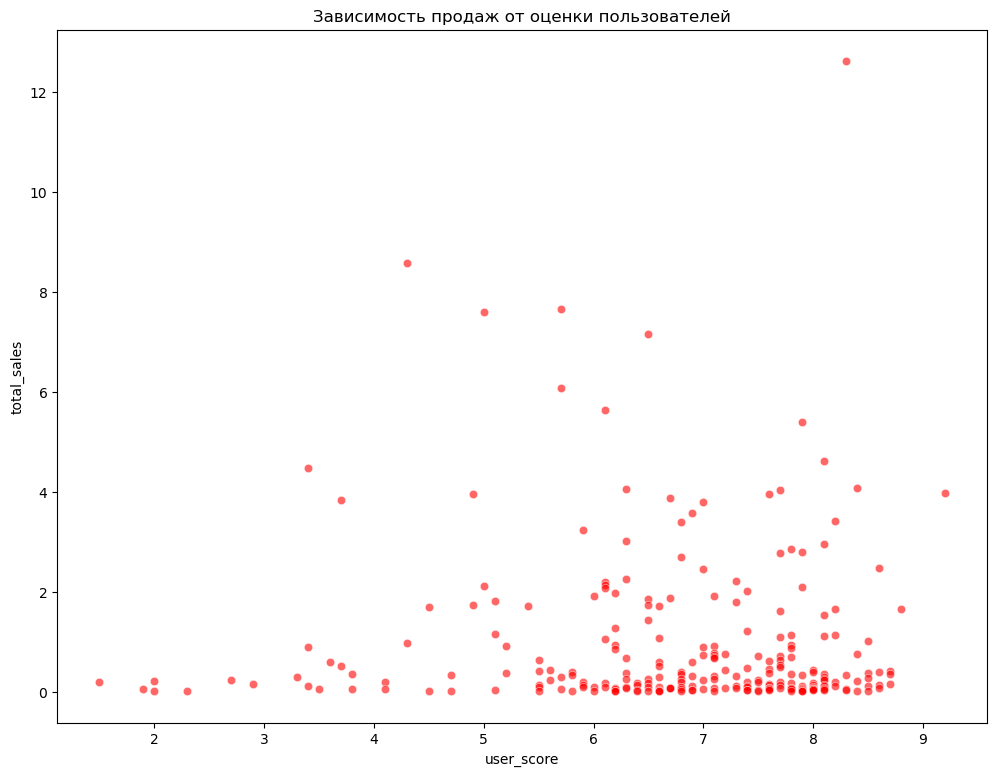

In [27]:
#Построим график зависимости продаж от оценки пользователей и посмотрим на уровень корреляции
print(games_ps4['user_score'].corr(games_ps4['total_sales']))
plt.figure(figsize=(12, 9))
sns.scatterplot(x=games_ps4['user_score'], y=games_ps4['total_sales'], color='red', alpha=0.6)
plt.title('Зависимость продаж от оценки пользователей')
plt.show()

Изучив два графика можно утверждать, что оценка критиков имеет, хоть и не сильное, влияние на уровень продаж. А вот оценка от пользователей показывает
неоднозначные реультаты: есть игры, которые показали высокие продажи, но получили весьма среднюю оценку от пользователей, 
а есть игры, которые имеют и очень высокие продажи и высокую оценку. Так как есть в выборке игры с высоким рейтингом, 
но с минимальными продажами (хотя возможно, это просто новинки) о взаимосвязи я бы не говорила.

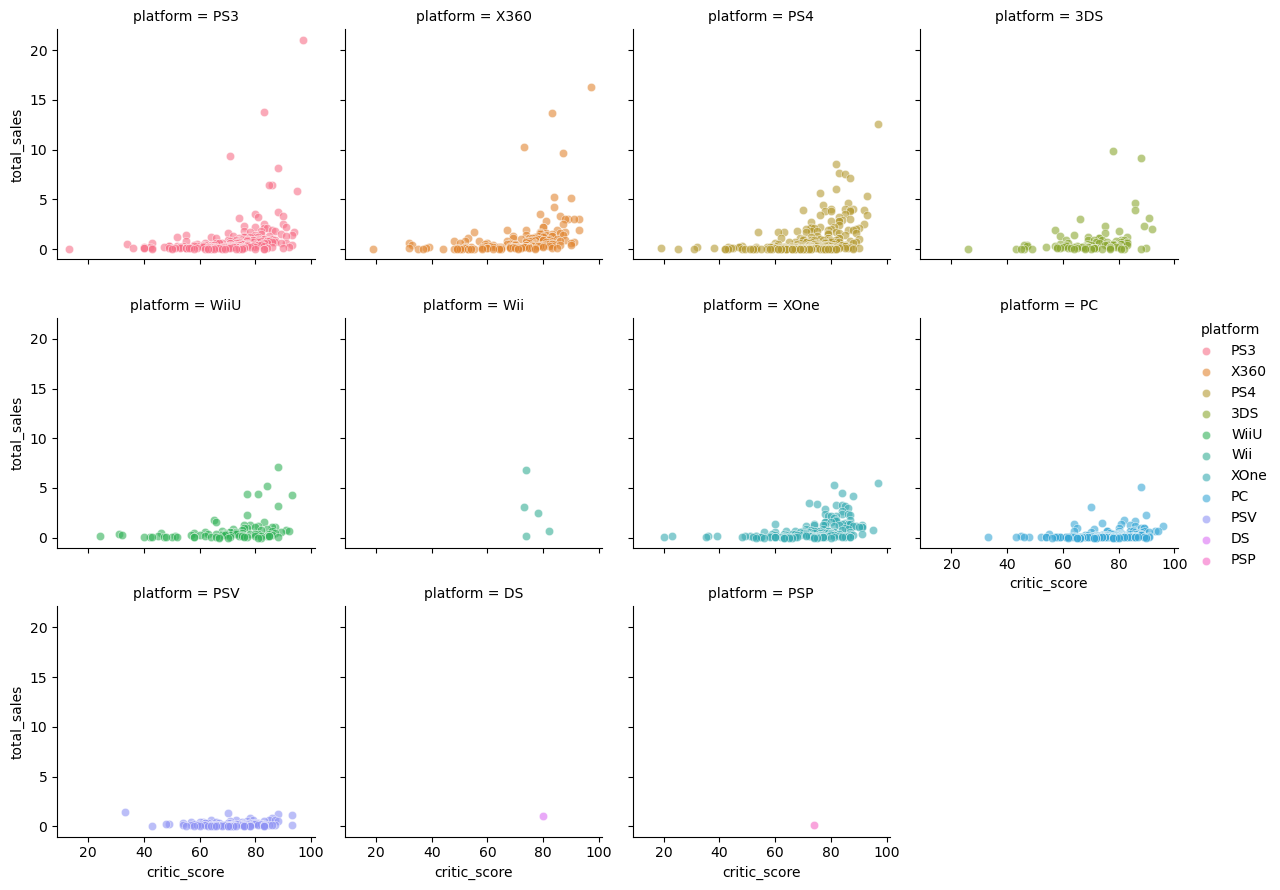

In [28]:
#Сделаем срез по оценкам не менее 1
games_plat = games.query('critic_score >= 1 and user_score >= 1') 
#Выведем графики по всем топ-платформам
grid = sns.FacetGrid(games_plat, col="platform", hue="platform", col_wrap=4)
grid.map(sns.scatterplot, "critic_score", "total_sales", alpha=0.6)
grid.add_legend();

По форме графиков платформ PS3, X360, PS4, 3DS, WiiU, XOne мы видим, что чем выше оценка критиков, тем скорее у игры будет больше продаж.

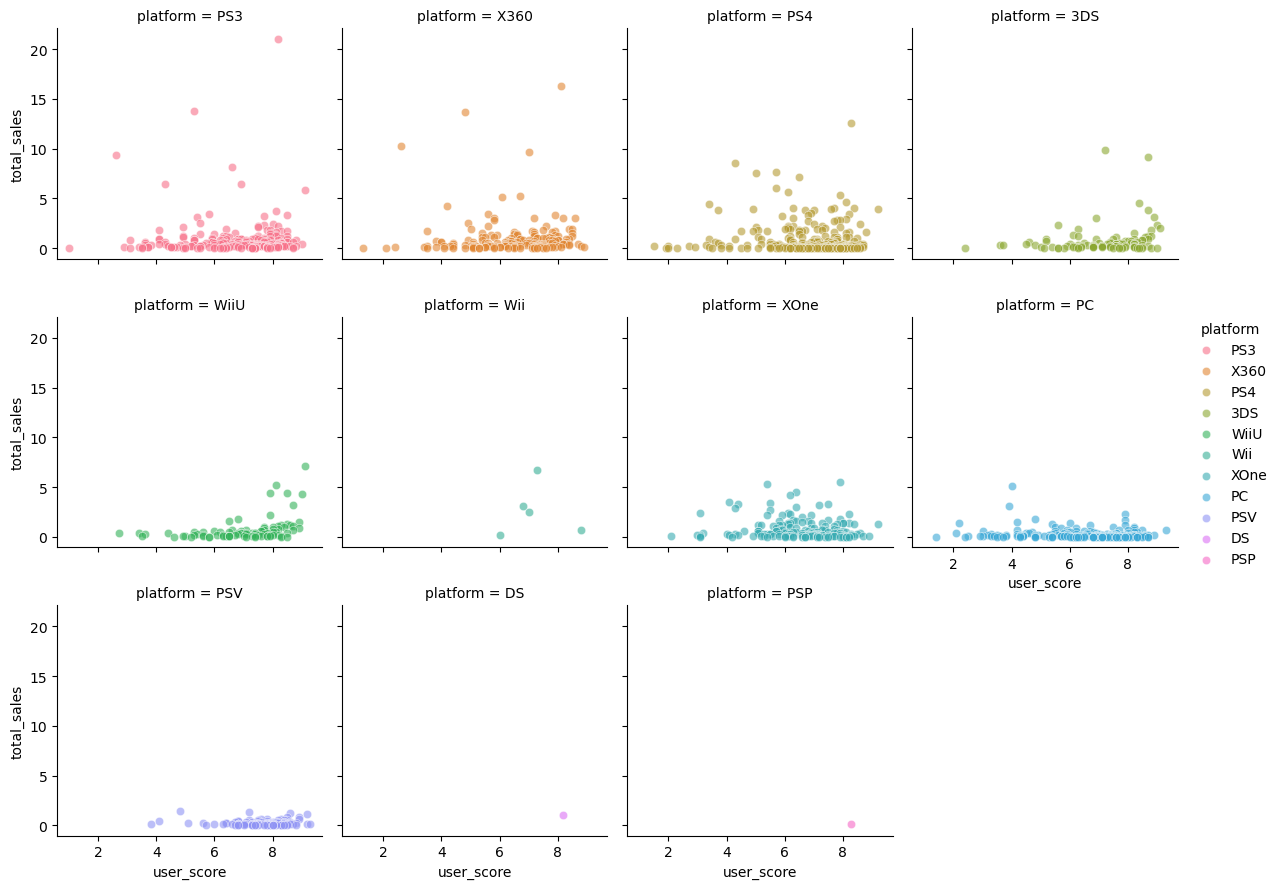

In [29]:
#Выведем графики по всем топ-платформам
grid = sns.FacetGrid(games_plat, col="platform", hue="platform", col_wrap=4)
grid.map(sns.scatterplot, "user_score", "total_sales", alpha=0.6)
grid.add_legend();

Здесь же данные распределенными хаотично - сложно сказать о какой-либо закономерности.

### Общее распределение игр по жанрам

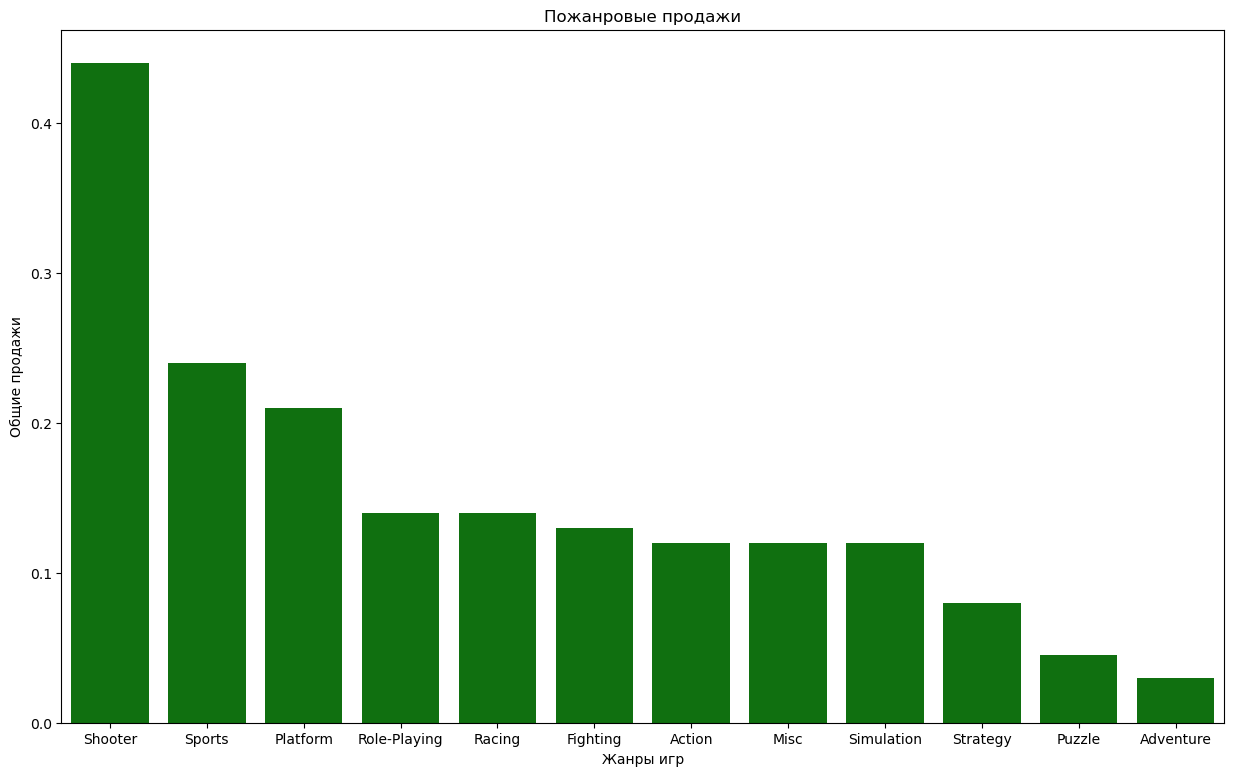

In [30]:
#Создадим новую переменную и поместим в нее сводную таблицу по продажам по жанрам
ganre_data = (
data.query('year_of_release >= 2012')
    .pivot_table(index='genre', values='total_sales', aggfunc='median')
    .sort_values(by='total_sales', ascending=False)
)
#Построим диаграмму зависимости продаж от жанра игры
plt.figure(figsize=(15,9))
(sns.barplot(data=ganre_data, x=ganre_data.index, y='total_sales', color='green')
.set(title = 'Пожанровые продажи', xlabel = 'Жанры игр', ylabel = 'Общие продажи'))
plt.show()

Самым популярным видом игр является Шутеры. На втором месте - Sport, далее Экшн-игры.

## Портрет пользователя каждого региона

### Определим популярные платформы для каждого региона

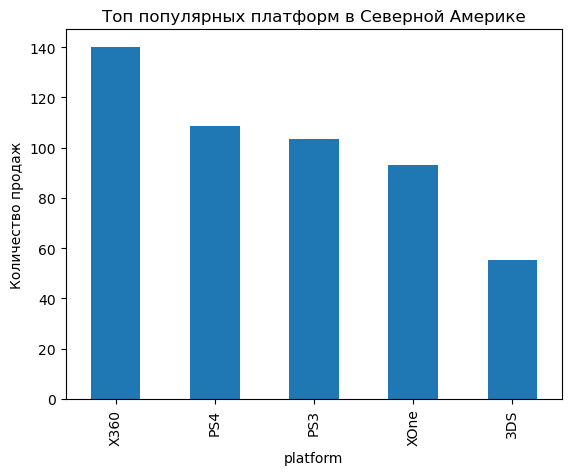

In [31]:
#Сгруппируем данные по Сев. Америке и посмотрим пятерку популярных платформ
games.groupby('platform')['na_sales'].agg('sum').sort_values(ascending=False)[:5].plot(kind='bar')
plt.title('Топ популярных платформ в Северной Америке')
plt.ylabel('Количество продаж')
plt.show()

Фаворит американская платформа Xbox, на втором месте - PS, на третьем Nintendo

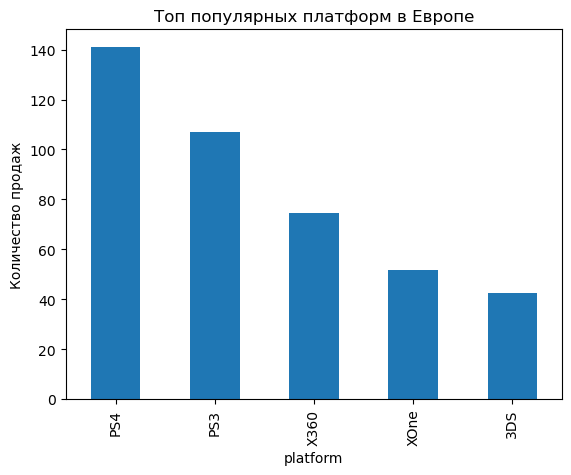

In [32]:
#Сгруппируем данные по Европе и посмотрим пятерку популярных платформ
games.groupby('platform')['eu_sales'].agg('sum').sort_values(ascending=False)[:5].plot(kind='bar')
plt.title('Топ популярных платформ в Европе')
plt.ylabel('Количество продаж')
plt.show()

Фаворит японская платформа PS, на втором месте - Xbox, на третьем Nintendo

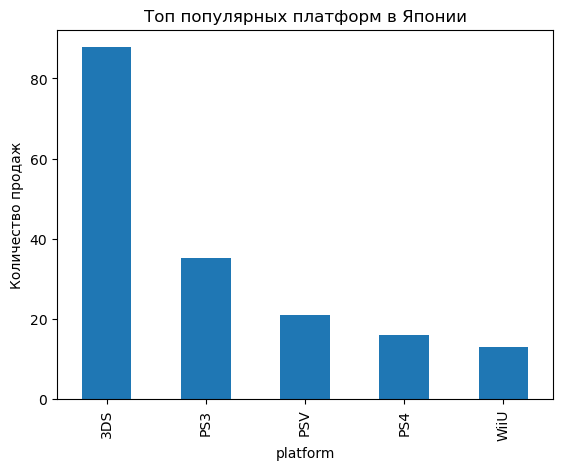

In [33]:
#Сгруппируем данные по Японии и посмотрим пятерку популярных платформ
games.groupby('platform')['jp_sales'].agg('sum').sort_values(ascending=False)[:5].plot(kind='bar')
plt.title('Топ популярных платформ в Японии')
plt.ylabel('Количество продаж')
plt.show()

Вкусы у жителей Cев.Америки и Европы очень даже схожи: мы видим одинаковые топ-5, хоть и доли различаются. 
В Японии самой популярной явилась родные разработки Nintendo и PS.

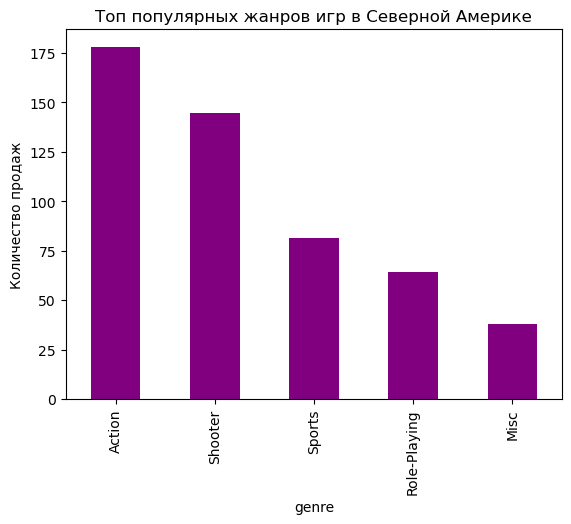

In [34]:
#Сгруппируем данные по Сев. Америке и посмотрим пятерку популярных жанров игр
games.groupby('genre')['na_sales'].agg('sum').sort_values(ascending=False)[:5].plot(kind='bar', color='purple')
plt.title('Топ популярных жанров игр в Северной Америке')
plt.ylabel('Количество продаж')
plt.show()

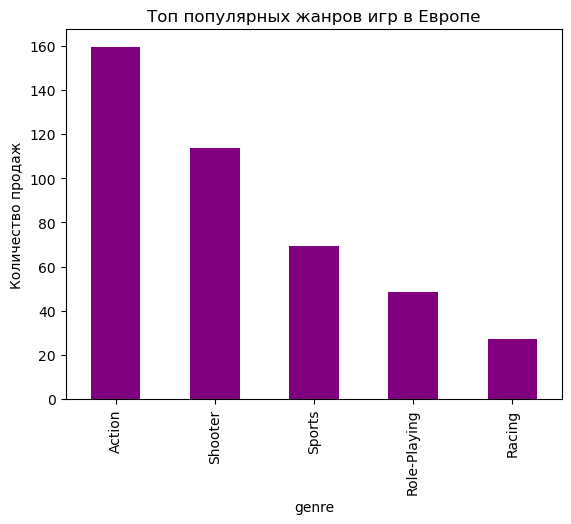

In [35]:
#Сгруппируем данные по Европе и посмотрим пятерку популярных жанров игр
games.groupby('genre')['eu_sales'].agg('sum').sort_values(ascending=False)[:5].plot(kind='bar', color='purple')
plt.title('Топ популярных жанров игр в Европе')
plt.ylabel('Количество продаж')
plt.show()

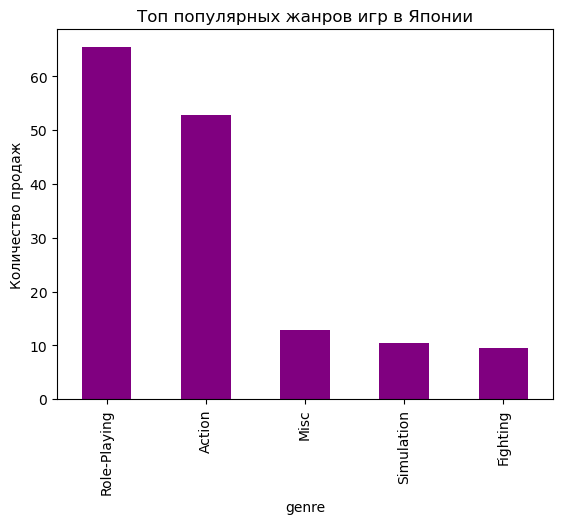

In [36]:
#Сгруппируем данные по Японии и посмотрим пятерку популярных жанров игр
games.groupby('genre')['jp_sales'].agg('sum').sort_values(ascending=False)[:5].plot(kind='bar', color='purple')
plt.title('Топ популярных жанров игр в Японии')
plt.ylabel('Количество продаж')
plt.show()

Вкусы у жителей Cев.Америки и Европы и в выборе жанров очень схожи: мы видим одинаковые топ-4. А предпочтения в Японии отличаются координально: фаворит - Ролевые игры. На втором месте - Экшн-игры, прочие игры занимают намного меньшую долю продаж.

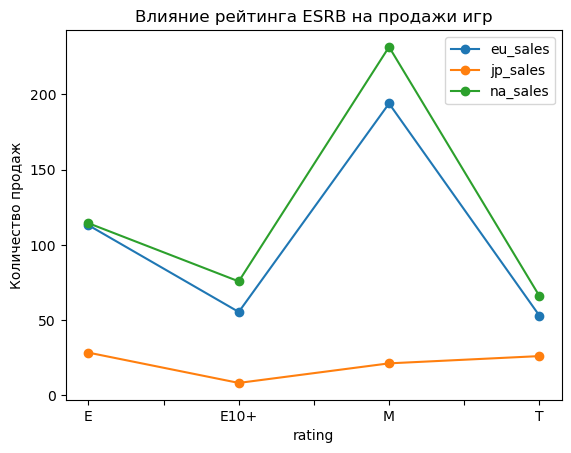

In [37]:
#Построим график влияния рейтинга на продажи по странам
(
    games.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
    .plot(style="o-")
)
plt.title('Влияние рейтинга ESRB на продажи игр')
plt.ylabel('Количество продаж')
plt.show()

Видим, что продажи игр в Сев. Америке и Европе преобладают для категорий взрослых людей (17+). 
В Японии также можно утверждать, что в игры играют подростки и взрослые люди. Но кривая показателя плавная, без скачков - это можно объйснить тем, что в Японии предпочтения отдают ролевым, миролюбивым играм, которые доступны всем возрастам.

## Проверка гипотиз

### Проверка гипотезы: средние пользовательские рейтинги платформы Xbox One и PC одинаковые.

H_0: Средний пользовательский рейтинг (user_score) Xbox One = средний пользовательский рейтинг (user_score) PC

H_a: Средний пользовательский рейтинг (user_score) Xbox One ≠ средний пользовательский рейтинг (user_score) PC

alpha = 0.05

In [38]:
#Создадим переменные для исследования
data = data.dropna(subset=['user_score'])
xone = data.query('platform == "XOne" and year_of_release >=2012')['user_score']
pc = data.query('platform == "PC" and year_of_release >=2012')['user_score']

In [39]:
#Проверим гипотезу
results = st.ttest_ind(xone, pc, equal_var=False)
alpha = .05
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


По данным у нас нет оснований утверждать, что средний пользовательский рейтинг игр Xbox One и PC значимо различаются.

### Проверка гипотезы: средние пользовательские рейтинги жанров Action и Sports разные.

H_0: Средний пользовательский рейтинг (user_score) игр жанра Action = средний пользовательский рейтинг (user_score) игр жанра Sports

H_a: Средний пользовательский рейтинг (user_score) игр жанра Action ≠ средний пользовательский рейтинг (user_score) игр жанра Sports

alpha = 0.05


In [40]:
action = data.query('genre == "Action" and year_of_release >=2012')['user_score']
sports = data.query('genre == "Sports" and year_of_release >=2012')['user_score']

In [41]:
results = st.ttest_ind(action, sports, equal_var=False)
alpha = .05
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


По данным мы можем предположить, что средние пользовательские рейтинги игр в жанрах Action и Sports разные.

## Вывод

В своей работе мы изучили данные о продажах, оценках игр в период с 1980 по 2016 для регионов Северная Америка, Европа и Япония. Для планирования продаж и рекламных кампаний в 2017 году мы более детально изучили данные за последние 5 лет (с 2012-2016гг), как периоды с равными показателями релизов.

Важно отметить, что рынок Северной Америки и Европы различается с рынком Японии. Поэтому для данных стран необходимо использовать разные стратегии.

Для рынка **Северной Америки** большим спросом будут пользоваться игры для консолей Xbox и с небольшим отставанием PlayStation. Данные платформы не только в данный момент являются прибыльными, но и за всю историю показывают высокий доход. Жанрово прибыльными играми будут Экшн-игры, Шутеры. Менее прибыльными, но востребованными спортивные и ролевые игры. Если говорить о возрасте игрока, то это взрослый человек от 17 лет, что вполне логично, если вернуться к популярным жанрам, где преобладают реалистичные, кровавые игры.

Игровые предпочтения стран Северной Америки и **Европы** очень схожи: и в любимых жанрах Экшн-игр и Шутеров, и в возрасте игроков. А вот популярная платформа - PlayStation. Xbox - вторая по популярности.

Для **японского** рынка следует выпускать другие игры:
- бессменный фаворит платформ - это Nintendo. PlayStation присутствует на рынке, но показывает в три раза меньше продаж.
- популярный жанр - ролевые миролюбивые игры. Следом с небольшой разницей идут игры-экшн. Но шутеров в топ-5 жанров нет.
- возрастные категории ярко не выражены - игры для всех категорий пользователей.

Применительно ко всем рынкам отметим, что присутствует взаимосвязь между высокой оценкой критиков и продажами: чем выше оценка, тем больше продаж. О пользовательском рейтинге такого сказать не можем: к примеру, при проверке одной из гипотез справедливо предположить, что ср. пользовательский рейтинг игр на PC и Xbox похожи, а вот доли продаж у них примерно 1/6 (за 5 лет игр на PC продали примерно 60млн, а суммарно на Xbox 400млн).